# Data Visualization

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
df = pd.read_csv("falcon9_dataset_transformed.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Flight number vs Payloadmass

We can plot out the <b>FlightNumber</b> vs. <b>PayloadMassand</b> overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

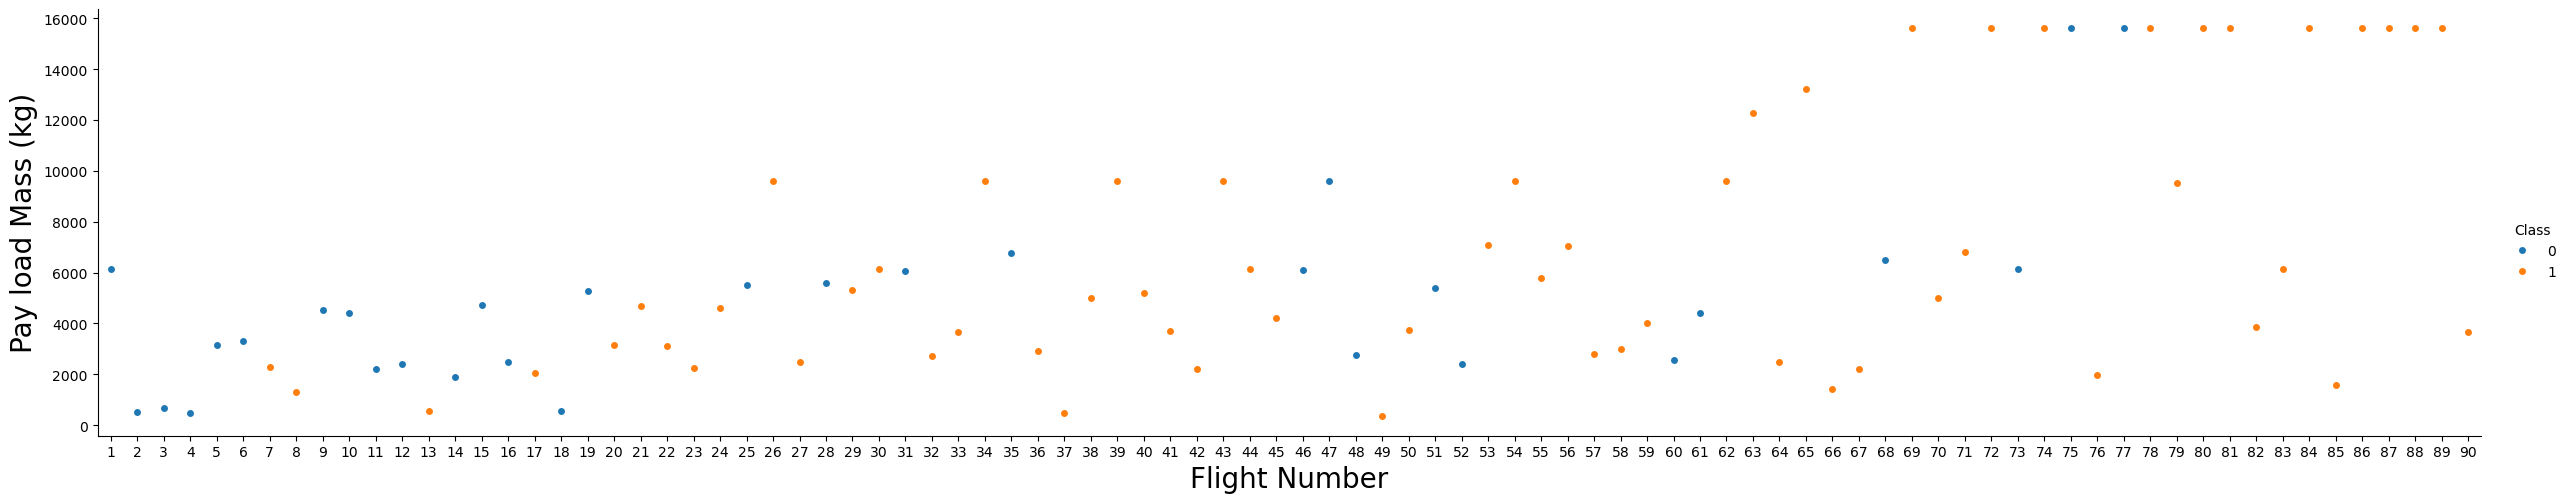

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## Flight Number vs Launchsite

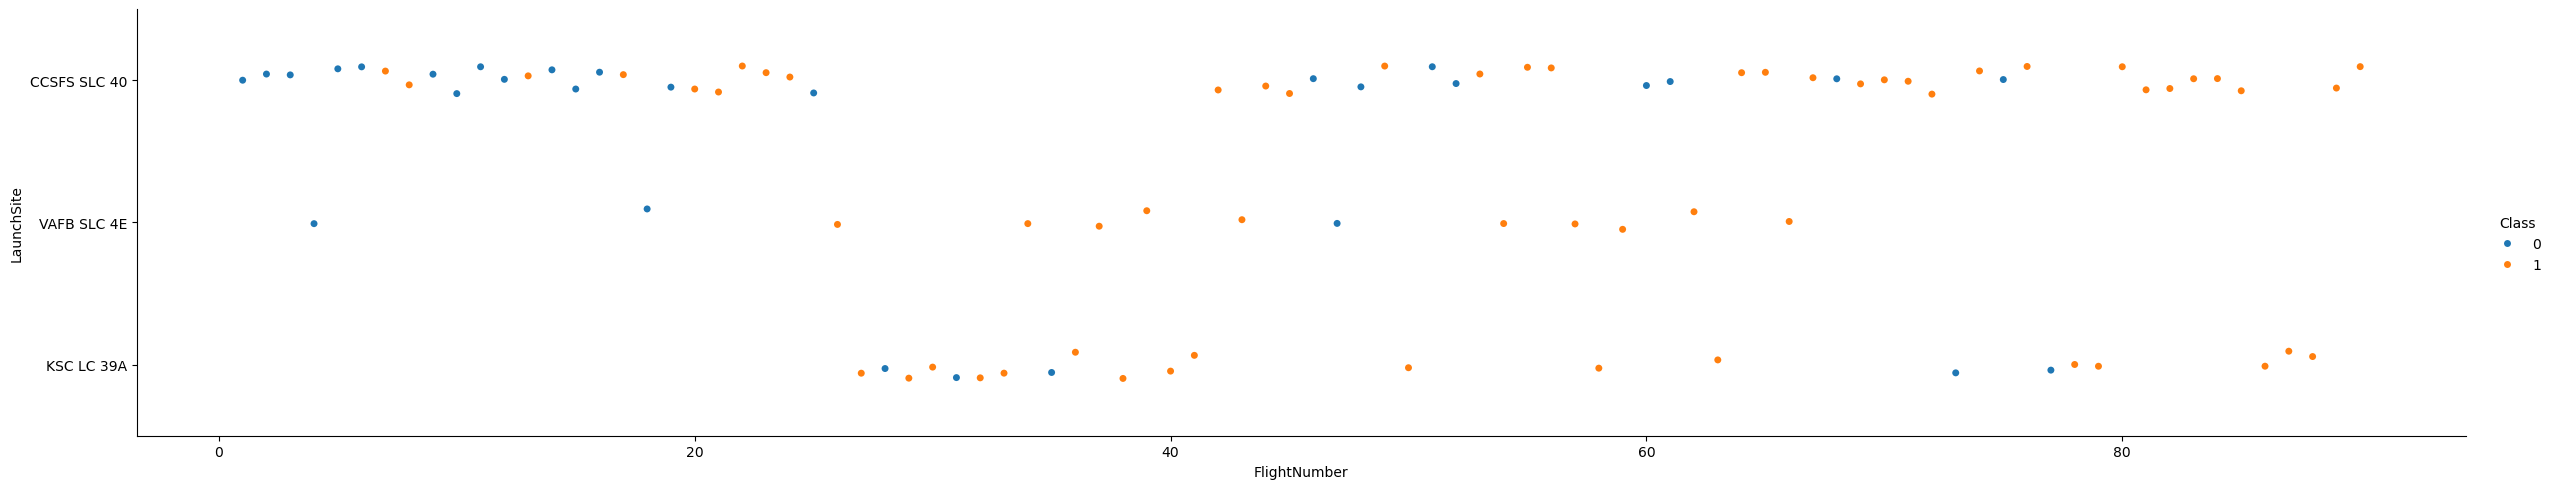

In [4]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)

* The success rate is increasing for each site
* Launchsite CCSFS SLC 40 accounts to more number of launches relative to the other two sites

## Payloadmass vs Launchsite

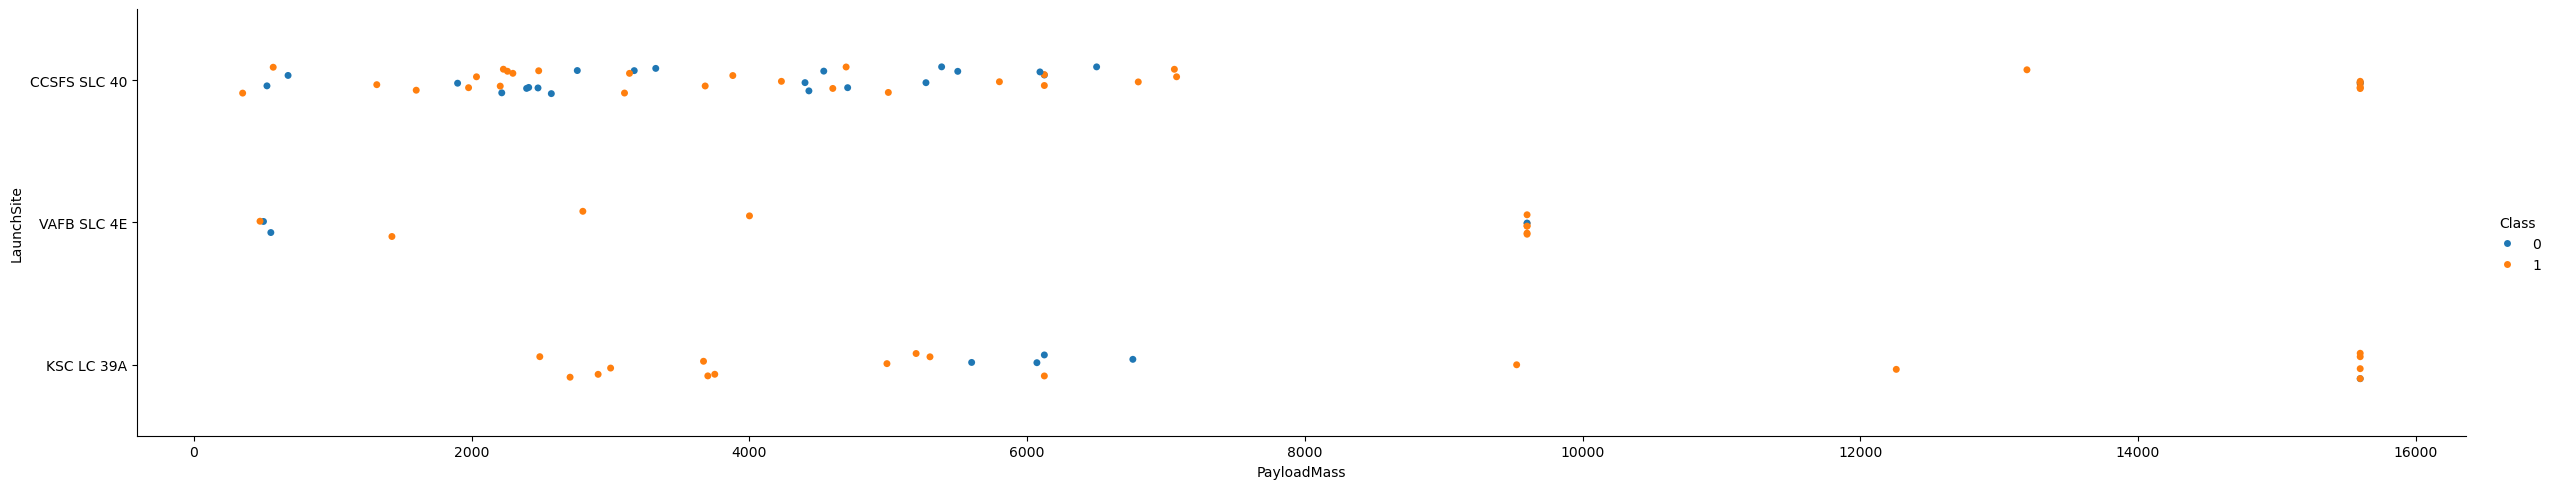

In [5]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)

* The majority of the missions with payloadmass above 7000kg were successfull
* KSC LC 39A has 100% success rate for payloads below 5500kg

## Success rate of each orbit type

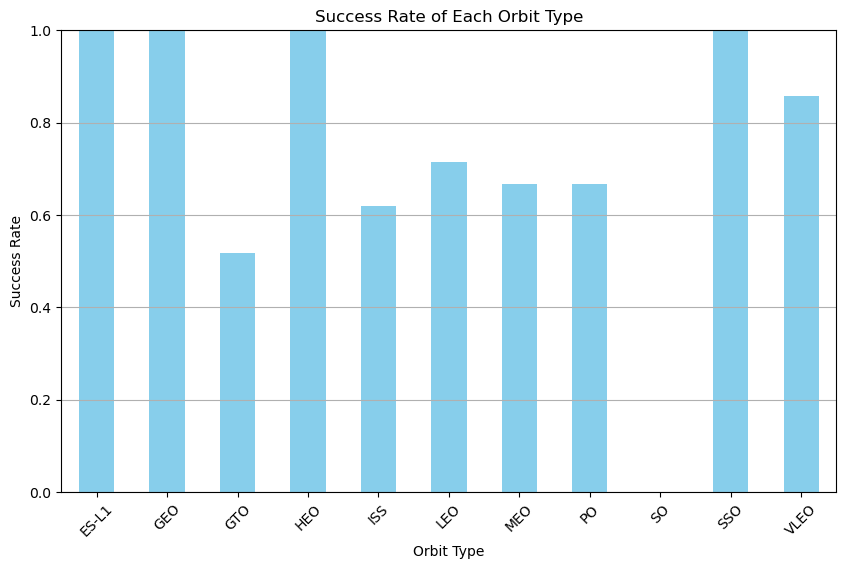

In [6]:
success_rate = df.groupby('Orbit')['Class'].mean()

plt.figure(figsize=(10, 6))
success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

* ES-L1, GEO, HEO and SSO have 100% success rate
* SO has a 0% success rate

## Flight number vs Orbit type

<Axes: xlabel='Orbit', ylabel='FlightNumber'>

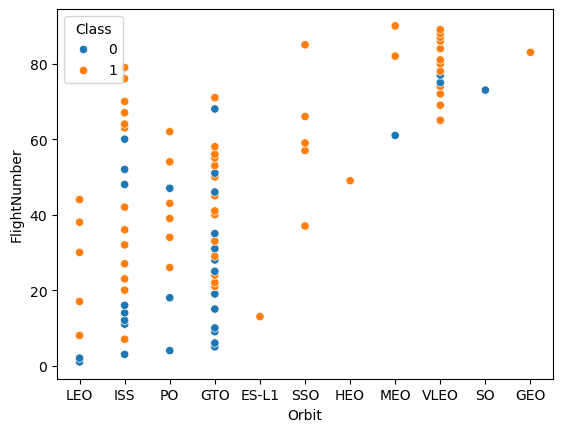

In [7]:
sns.scatterplot(y="FlightNumber", x="Orbit", hue="Class", data=df)

* In LEO, success seems to be related to the number of flights
* But in GTO, there appears to be no relation

## Payloadmass vs Orbit type

<Axes: xlabel='Orbit', ylabel='PayloadMass'>

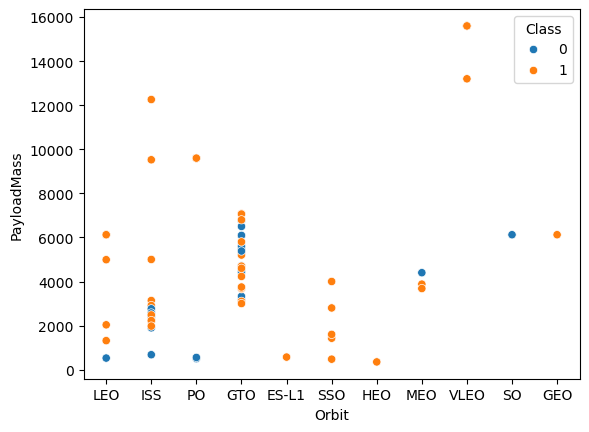

In [8]:
sns.scatterplot(y="PayloadMass", x="Orbit", hue="Class", data=df)

* For Polar, LEO and ISS, the success rate is higher for heavier payloads
* However for GTO, it's difficult to distinguish

## Yearly trend of launches

In [9]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

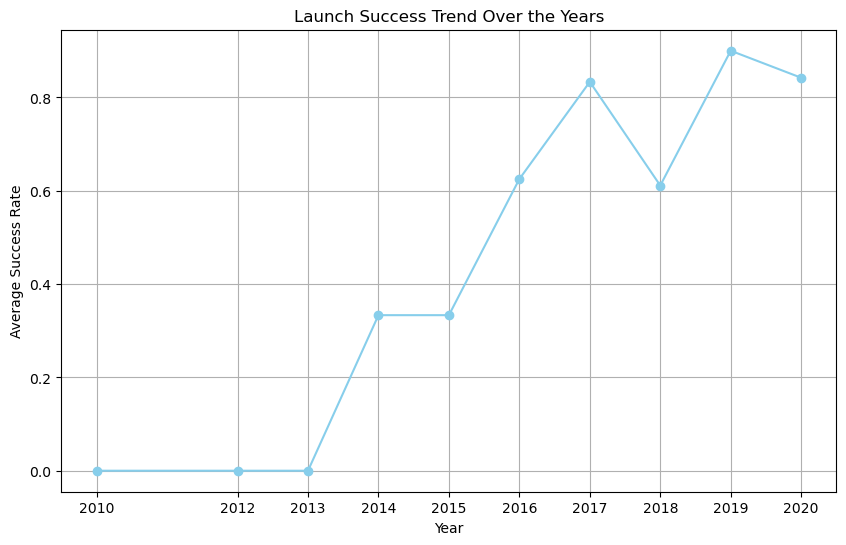

In [10]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])

# Convert Year to integer for plotting
df['Year'] = df['Year'].astype(int)

# Group by Year and calculate average success rate
yearly_success = df.groupby('Year')['Class'].mean()

# Plotting the line chart
plt.figure(figsize=(10, 6))
yearly_success.plot(kind='line', marker='o', color='skyblue')
plt.title('Launch Success Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.xticks(yearly_success.index)  
plt.grid(True)

plt.show()

The success rate since 2013 kept increasing till 2020